### Training And Testing Available Data


##### We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split training and testing dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/carprices.csv')

In [5]:
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [6]:
df.sample(4)

,Mileage,Age(yrs),Sell Price($)
3,22500,2,40000
1,35000,3,34000
16,28000,2,35500
18,87600,8,12800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mileage        20 non-null     int64
 1   Age(yrs)       20 non-null     int64
 2   Sell Price($)  20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [8]:
import matplotlib.pyplot as plt

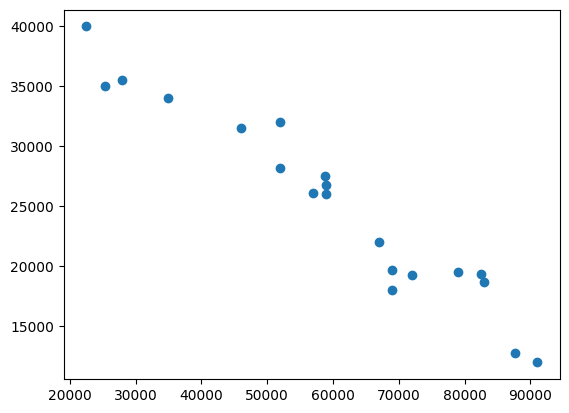

In [9]:
# Car Milage VS Sell Price
plt.scatter(df['Mileage'],df['Sell Price($)'])

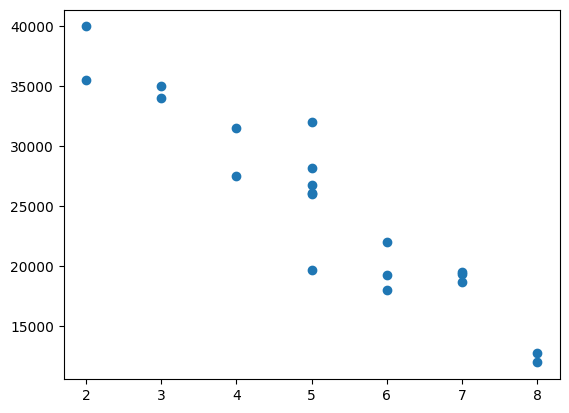

In [10]:
# Car Age Vs Sell Price ($)
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])


###### Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

The approach we are going to use here is to split available data in two sets

Training: We will train our model on this dataset
Testing: We will use this subset to make actual predictions using trained model
The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

In [11]:
X = df[['Mileage','Age(yrs)']]

In [12]:
len(X)

20

In [13]:
y = y = df['Sell Price($)']

In [14]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [16]:
len(X_train)


14

In [17]:
len(X_test)


6

In [18]:
y_train


13    27500
0     18000
5     26750
12    26000
9     22000
8     12000
7     19300
17    19700
1     34000
16    35500
15    35000
10    18700
18    12800
14    19400
Name: Sell Price($), dtype: int64

In [19]:
y_test

3     40000
4     31500
11    19500
6     32000
19    28200
2     26100
Name: Sell Price($), dtype: int64

In [20]:
# Lets run linear regression model now
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [21]:
X_test

,Mileage,Age(yrs)
3,22500,2
4,46000,4
11,79000,7
6,52000,5
19,52000,5
2,57000,5


In [22]:
prediction = reg.predict(X_test)

In [23]:
y_test

3     40000
4     31500
11    19500
6     32000
19    28200
2     26100
Name: Sell Price($), dtype: int64

In [25]:
reg.score(X_test, y_test)

0.7840312868015398

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2499.243439447131
MSE: 8413241.196573684
RMSE: 2900.558773163144


Text(0, 0.5, 'Predicted Y')

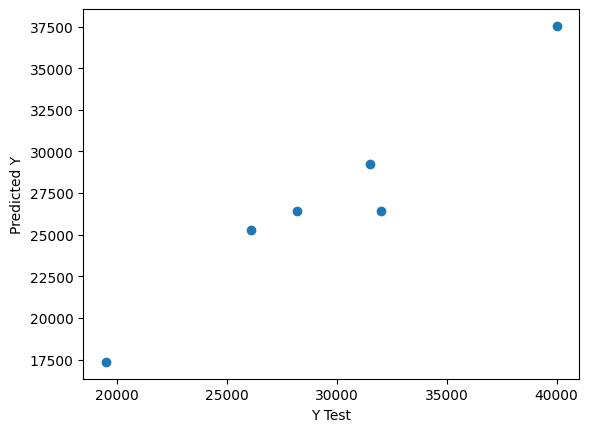

In [29]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')